In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("tested.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# data exploration

In [4]:
data = df.head(10)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [5]:
print("Titanic Data Size  :" ,df.size)
print("Titanic Data Shape :" ,df.shape)

Titanic Data Size  : 5016
Titanic Data Shape : (418, 12)


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
df.sum()

PassengerId                                               460009
Survived                                                     152
Pclass                                                       947
Name           Kelly, Mr. JamesWilkes, Mrs. James (Ellen Need...
Sex            malefemalemalemalefemalemalefemalemalefemalema...
Age                                                      10050.5
SibSp                                                        187
Parch                                                        164
Ticket         3309113632722402763151543101298753833097224873...
Fare                                                  14856.5376
Embarked       QSQSSSQSCSSSSSSCQCSCCSSCCSCCSCSSSSCCSSSSCSSSSS...
dtype: object

# data visualization


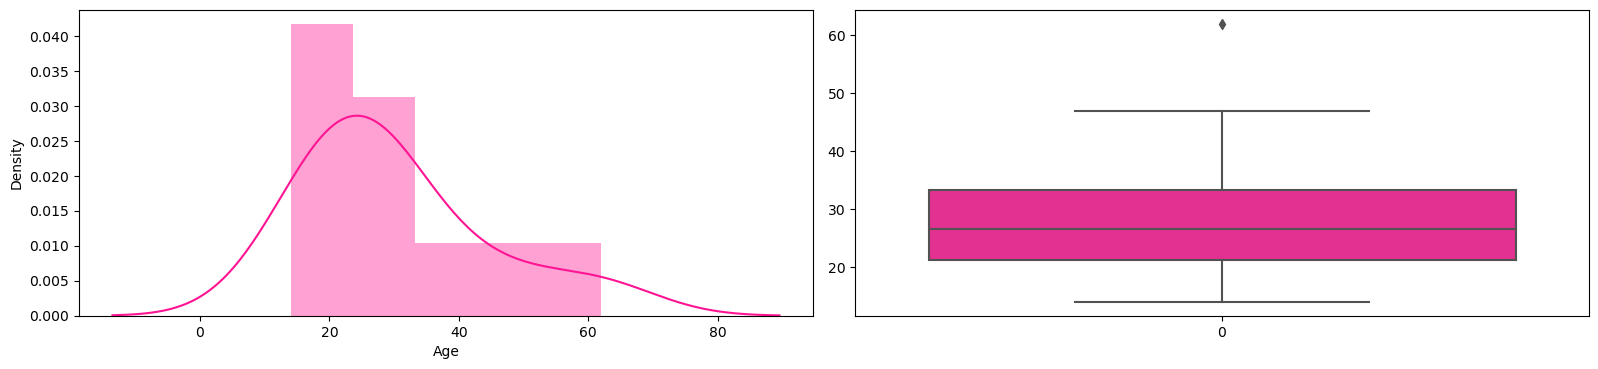

In [9]:
plt.figure(figsize=(16,7))

plt.subplot(2,2,1)
sns.distplot(data['Age'],color='DeepPink')
plt.subplot(2,2,2)
sns.boxplot(data['Age'],color='DeepPink')

plt.tight_layout()
plt.show()

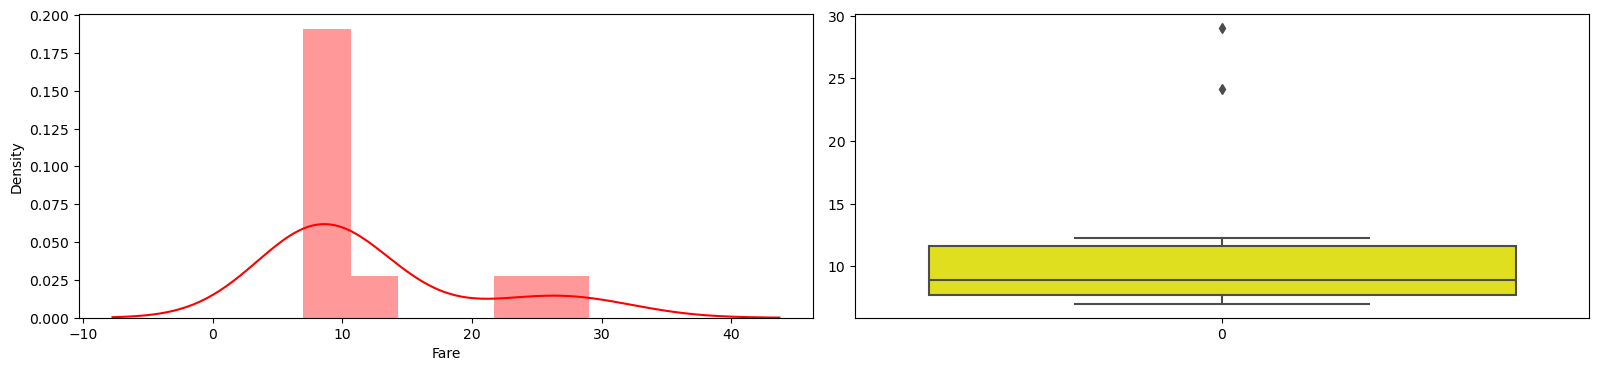

In [10]:
plt.figure(figsize=(16,7))
plt.subplot(2,2,3)
sns.distplot(data['Fare'],color='Red')
plt.subplot(2,2,4)
sns.boxplot(data['Fare'],color='Yellow')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Sex')

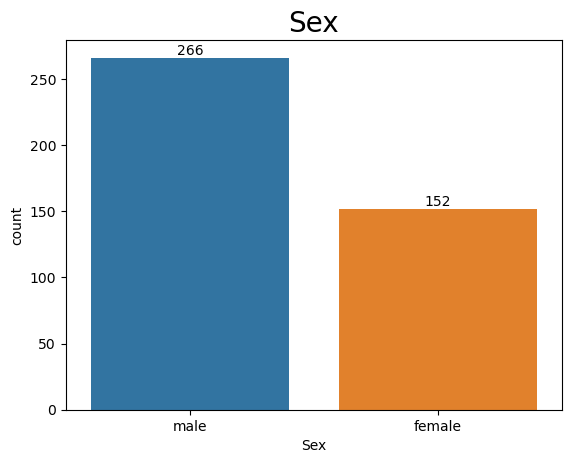

In [11]:
ax = sns.countplot(x='Sex', data=df)
ax.bar_label(ax.containers[0])
plt.title("Sex", fontsize=20)

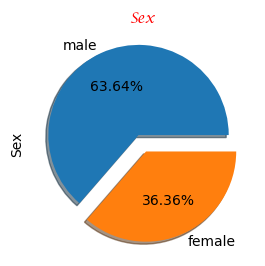

In [12]:
ax =plt.subplot(1,2,2)
ax=df['Sex'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Sex", fontsize = 20,color='Red',font='Lucida Calligraphy');

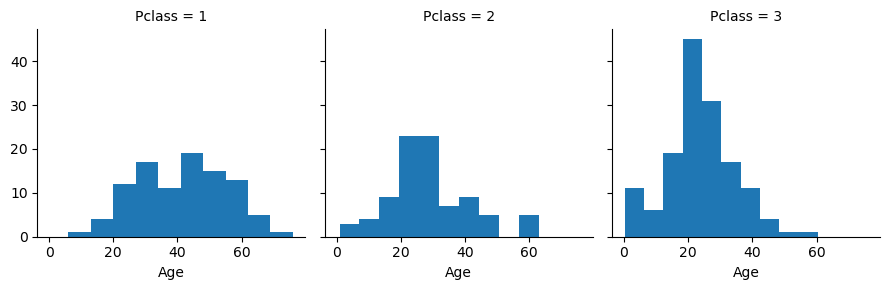

In [13]:
g = sns.FacetGrid(df, col="Pclass")
g = g.map(plt.hist, "Age")

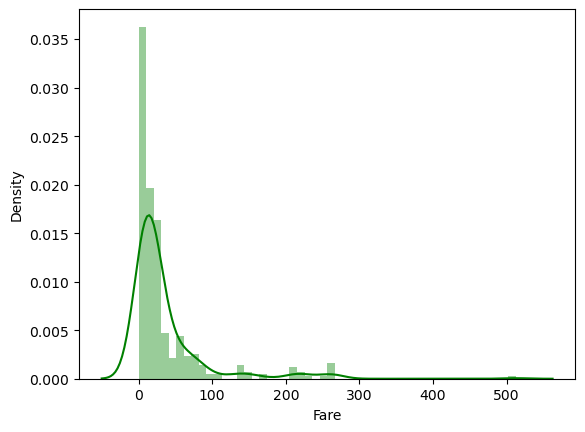

In [14]:
sns.distplot(df['Fare'],color="g")
plt.show()

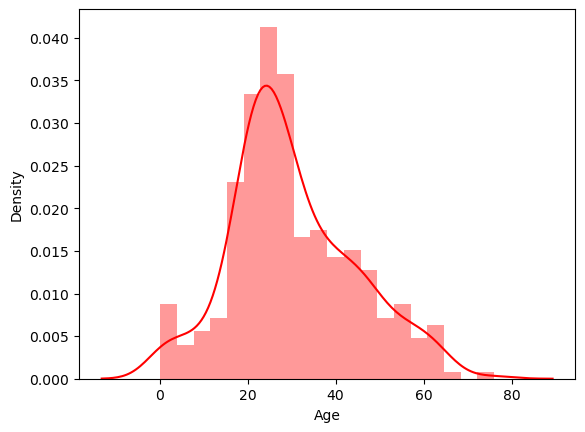

In [15]:
sns.distplot(df['Age'],color="r",bins=20,kde=True,)
plt.show()

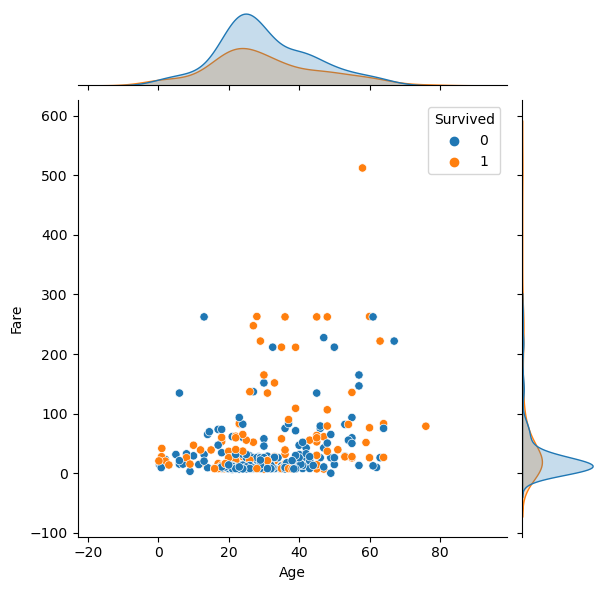

In [16]:
sns.jointplot(x="Age",y="Fare",data=df,color="olive",hue="Survived")
plt.show()

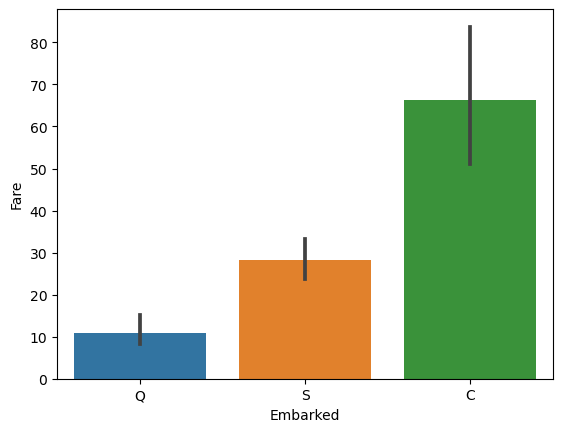

In [17]:
sns.barplot(y='Fare',x='Embarked',data=df)
plt.show()

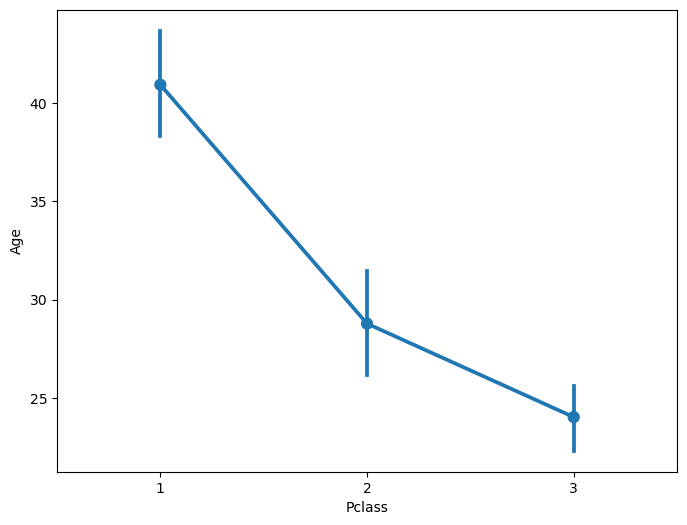

In [18]:
f, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x="Pclass", y="Age", data=df)
plt.show()

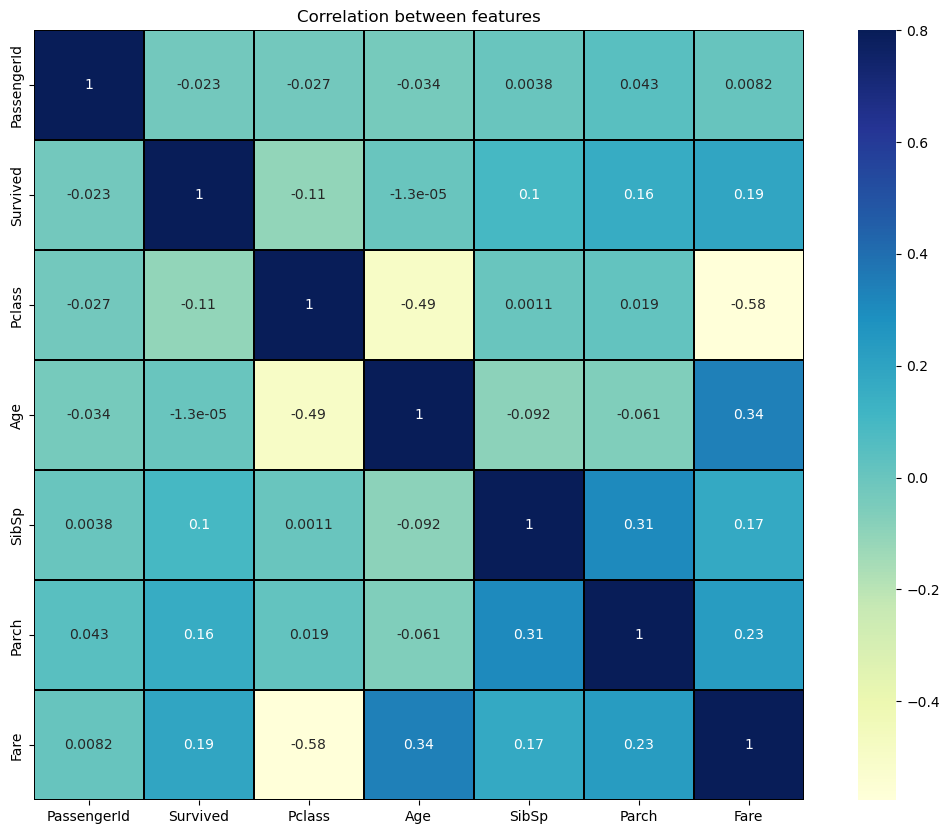

In [19]:
corr=df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features')
plt.show()

# data preprocessing


In [20]:
## Finding the Null value in data
df.isnull().sum().sort_values(ascending= False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [21]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [22]:
missing(df)

,Missing_Number,Missing_Percent
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


# removing null value form data set

In [23]:
# Filled the missing value in Age column with the mean value
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Filled the missing value in Fare columns with mean Value
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

# Filled the missing value in Embarked columns with backfill method
df['Embarked'] = df['Embarked'].fillna(method='backfill')

In [24]:
# Drop the columns 
df = df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S


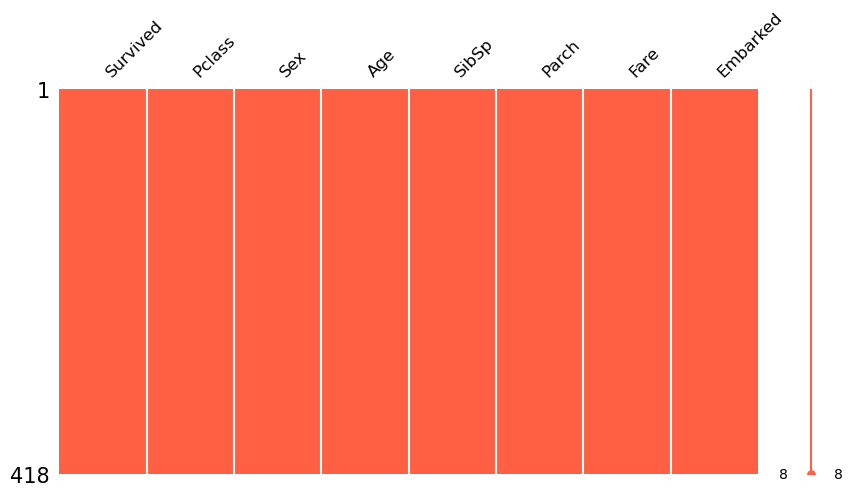

In [25]:
import missingno
missingno.matrix(df, figsize=(10,5), fontsize=12, color=(1, 0.38, 0.27));

# Categorical value is converted into numerical value by using categorical_encoder

In [26]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Survived','Pclass','Sex','Embarked'])
df_encoded = encoder.fit_transform(df)
df_encoded.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,1,34.5,0,0,7.8292,1
1,2,1,2,47.0,1,0,7.0000,2
2,1,2,1,62.0,0,0,9.6875,1
3,1,1,1,27.0,0,0,8.6625,2
4,2,1,2,22.0,1,1,12.2875,2


# Splitting Independent and Dependent Variable

In [27]:
X = df_encoded.drop(['Survived'],axis=1)
y = df['Survived']

# Splitting train and test set

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state= 21)

In [29]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
179,3,2,64.00,0,2,83.1583,3
201,1,1,0.33,0,2,14.4000,2
336,2,1,32.00,0,0,13.0000,2
187,1,1,17.00,2,0,8.0500,2
214,1,2,38.00,4,2,7.7750,2


In [30]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

# Model Implementation

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)),'\n')
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)),'\n')
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_lr)),'\n')
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_lr),'\n')
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))

Training set score: 1.00 

Test set score: 1.00 

Accuracy Score: 1.00 

Confusion Matrix: 
 [[76  0]
 [ 0 50]] 

Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [32]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred_lr) * 100
print("Logistic Regression Accuracy:  " +str(round(accuracy,2)) + '%')
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_lr))
print('MSE:', metrics.mean_squared_error(y_test,y_pred_lr))
print('RMSE:',np.sqrt(metrics.mean_absolute_error(y_test,y_pred_lr)))

Logistic Regression Accuracy:  100.0%
MAE: 0.0
MSE: 0.0
RMSE: 0.0
